In [1]:
using Images
using TestImages

## Descriptors used in this notebook

- BRIEF
- ORB
- BRISK
- FREAK

## BRIEF Descriptor

*BRIEF* (Binary Robust Independent Elementary Features) is an efficient feature point descriptor. It is highly discriminative even when using relatively few bits and is computed using simple intensity difference tests. BRIEF does not have a sampling pattern thus pairs can be chosen at any point on the `SxS` patch.

To build a BRIEF descriptor of length `n`, we need to determine `n` pairs `(Xi,Yi)`. Denote by `X` and `Y` the vectors of point `Xi` and `Yi`, respectively.

In **ImageFeatures.jl** we have five methods to determine the vectors `X` and `Y` :

- **`random_uniform`**: `X` and `Y` are randomly uniformly sampled
- **`gaussian`** : `X` and `Y` are randomly sampled using a Gaussian distribution, meaning that locations that are closer to the center of the patch are preferred
- **`gaussian_local`** : `X` and `Y` are randomly sampled using a Gaussian distribution where first `X` is sampled with a standard deviation of `0.04*S^2` and then the `Yi’s` are sampled using a Gaussian distribution – Each `Yi` is sampled with mean `Xi` and standard deviation of `0.01 * S^2`
- **`random_coarse`** : `X` and `Y` are randomly sampled from discrete location of a coarse polar grid
- **`center_sample`** : For each `i`, `Xi` is `(0, 0)` and `Yi` takes all possible values on a coarse polar grid

As with all the binary descriptors, BRIEF’s distance measure is the number of different bits between two binary strings which can also be computed as the sum of the XOR operation between the strings.

BRIEF is a very simple feature descriptor and does not provide scale or rotation invariance (only translation invariance). To achieve those, see [ORB](orb.md), [BRISK](brisk.md) and [FREAK](freak.md).

## Example


Let us take a look at a simple example where the BRIEF descriptor is used to match two images where one has been translated by `(100, 200)` pixels. We will use the `lena_gray` image from the [TestImages](https://github.com/timholy/TestImages.jl) package for this example.


Now, let us create the two images we will match using BRIEF.





In [35]:
using ImageFeatures, TestImages, Images, ImageDraw, CoordinateTransformations

img = testimage("lena_gray");
img1 = Gray.(img);
trans = Translation(-20, -20)
img2 = warp(img1, trans, indices(img1));

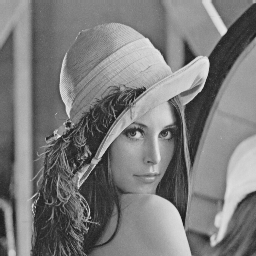

In [36]:
img1

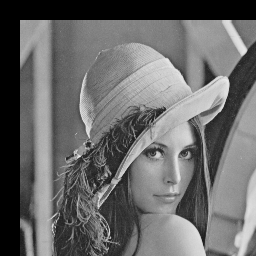

In [37]:
img2

To calculate the descriptors, we first need to get the keypoints. For this tutorial, we will use the FAST corners to generate keypoints (see [`fastcorners`](@ref).


In [38]:
keypoints_1 = Keypoints(fastcorners(img1, 12, 0.4))
keypoints_2 = Keypoints(fastcorners(img2, 12, 0.4));

To create the BRIEF descriptor, we first need to define the parameters by calling the `BRIEF` constructor.


In [39]:
brief_params = BRIEF(size = 256, window = 10, seed = 123);

Now pass the image with the keypoints and the parameters to the [`create_descriptor`](@ref) function.


In [40]:
desc_1, ret_keypoints_1 = create_descriptor(img1, keypoints_1, brief_params);
desc_2, ret_keypoints_2 = create_descriptor(img2, keypoints_2, brief_params);

The obtained descriptors can be used to find the matches between the two images using the `match_keypoints` function.


In [41]:
matches = match_keypoints(ret_keypoints_1, ret_keypoints_2, desc_1, desc_2, 0.1);

We can use the [ImageDraw.jl](https://github.com/JuliaImages/ImageDraw.jl) package to view the results.


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] one(::Type{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}}}) at /Users/david/.julia/v0.6/ColorTypes/src/traits.jl:341
 [3] draw! at /Users/david/.julia/v0.6/ImageDraw/src/line2d.jl:64 [inlined] (repeats 2 times)
 [4] _collect(::Array{Array{CartesianIndex{2},1},1}, ::Base.Generator{Array{Array{CartesianIndex{2},1},1},##17#18}, ::Base.EltypeUnknown, ::Base.HasShape) at ./array.jl:488
 [5] map(::Function, ::Array{Array{CartesianIndex{2},1},1}) at ./abstractarray.jl:1868
 [6] include_string(::String, ::String) at ./loading.jl:522
 [7] include_string(::Module, ::String, ::String) at /Users/david/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/david/.julia/v0.6/IJulia/src/execute_request.jl:158
 [9] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/david/.julia/v0.6/Compat/src/Compat.jl:488
 [10] eventloop(::ZMQ.Socket) a

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

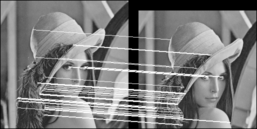
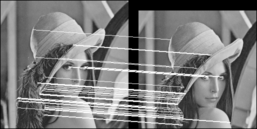
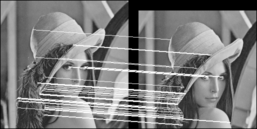
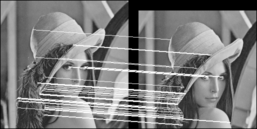
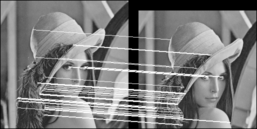
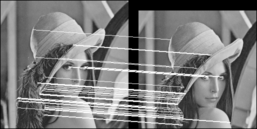
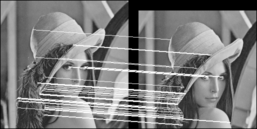
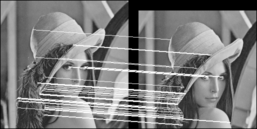
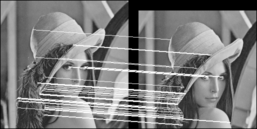
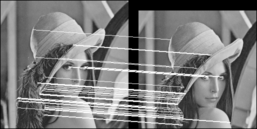
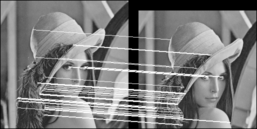
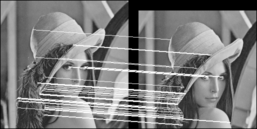
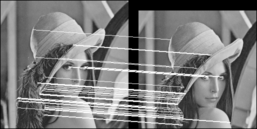
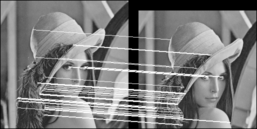
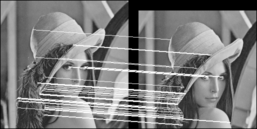
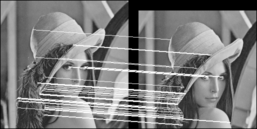
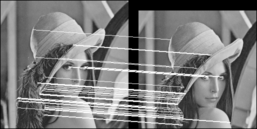
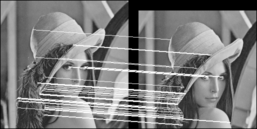
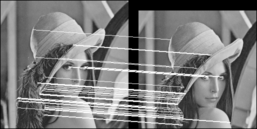
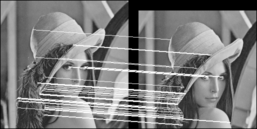
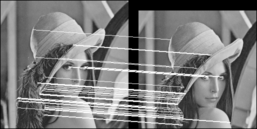
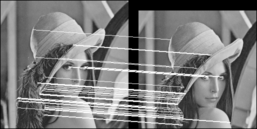
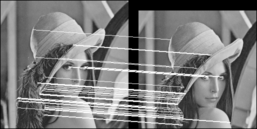
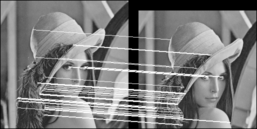
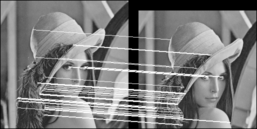
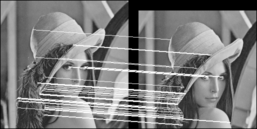
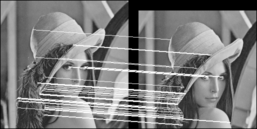
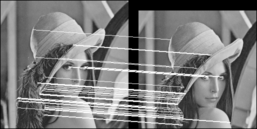
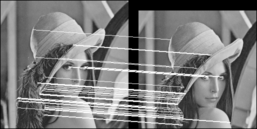
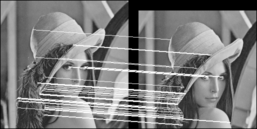
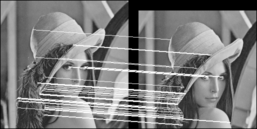
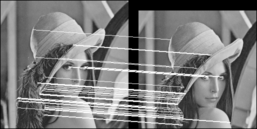
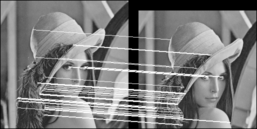
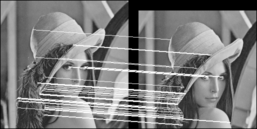
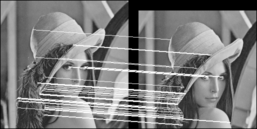
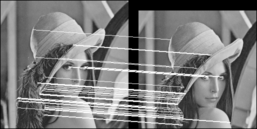
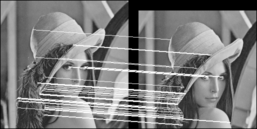
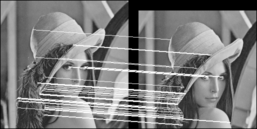
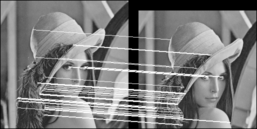
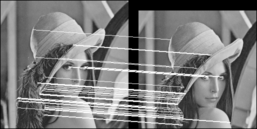
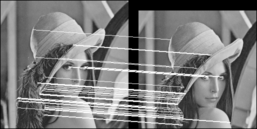
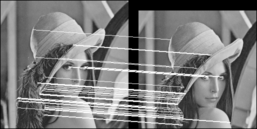
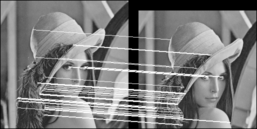
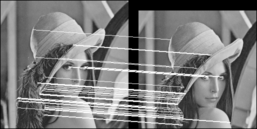
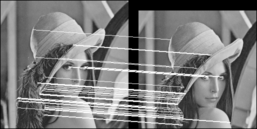

In [42]:
grid = hcat(img1, img2)
offset = CartesianIndex(0, size(img1, 2))
map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)

In [43]:
save("./images/brief_example.jpg", grid) 

## ORB

The *ORB* descriptor is a somewhat similar to BRIEF. It doesn’t have an elaborate sampling pattern as BRISK or FREAK.

However, there are two main differences between ORB and BRIEF:

- ORB uses an orientation compensation mechanism, making it rotation invariant.
- ORB learns the optimal sampling pairs, whereas BRIEF uses randomly chosen sampling pairs.

The ORB descriptor uses the intensity centroid as a measure of orientation. To calculate the centroid, we first need to find the moment of a patch, which is given by `Mpq = x,yxpyqI(x,y)`. The centroid, or ‘centre of mass' is then given by `C=(M10M00, M01M00)`.

The vector from the corner’s center to the centroid gives the orientation of the patch. Now, the patch can be rotated to some predefined canonical orientation before calculating the descriptor, thus achieving rotation invariance.

ORB tries to take sampling pairs which are uncorrelated so that each new pair will bring new information to the descriptor, thus maximizing the amount of information the descriptor carries. We also want high variance among the pairs making a feature more discriminative, since it responds differently to inputs. To do this, we consider the sampling pairs over keypoints in standard datasets and then do a greedy evaluation of all the pairs in order of distance from mean till the number of desired pairs are obtained i.e. the size of the descriptor.

The descriptor is built using intensity comparisons of the pairs. For each pair if the first point has greater intensity than the second, then 1 is written else 0 is written to the corresponding bit of the descriptor.

## Example

Let us take a look at a simple example where the ORB descriptor is used to match two images where one has been translated by `(50, 40)` pixels and then rotated by an angle of 75 degrees. We will use the `lighthouse` image from the [TestImages](https://github.com/JuliaImages/TestImages.jl) package for this example.

First, let us create the two images we will match using ORB.



In [60]:
img = testimage("lighthouse")
img1 = Gray.(img)
rot = recenter(RotMatrix(5pi/6), [size(img1)...] .÷ 2)  # a rotation around the center
tform = rot ∘ Translation(-50, -40)
img2 = warp(img1, tform, indices(img1));

The ORB descriptor calculates the keypoints as well as the descriptor, unlike BRIEF. To create the ORB descriptor, we first need to define the parameters by calling the `ORB` constructor.


In [61]:
orb_params = ORB(num_keypoints = 1000)

ImageFeatures.ORB(1000, 12, 0.25, 0.04, 1.3, 8, 1.2)

Now pass the image with the parameters to the `create_descriptor` function.


In [62]:
desc_1, ret_keypoints_1 = create_descriptor(img1, orb_params)
desc_2, ret_keypoints_2 = create_descriptor(img2, orb_params);

The obtained descriptors can be used to find the matches between the two images using the [`match_keypoints`] function.


In [63]:
matches = match_keypoints(ret_keypoints_1, ret_keypoints_2, desc_1, desc_2, 0.2);

In [64]:
grid = hcat(img1, img2)
offset = CartesianIndex(0, size(img1, 2))
map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] one(::Type{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}}}) at /Users/david/.julia/v0.6/ColorTypes/src/traits.jl:341
 [3] draw! at /Users/david/.julia/v0.6/ImageDraw/src/line2d.jl:64 [inlined] (repeats 2 times)
 [4] _collect(::Array{Array{CartesianIndex{2},1},1}, ::Base.Generator{Array{Array{CartesianIndex{2},1},1},##29#30}, ::Base.EltypeUnknown, ::Base.HasShape) at ./array.jl:488
 [5] map(::Function, ::Array{Array{CartesianIndex{2},1},1}) at ./abstractarray.jl:1868
 [6] include_string(::String, ::String) at ./loading.jl:522
 [7] include_string(::Module, ::String, ::String) at /Users/david/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/david/.julia/v0.6/IJulia/src/execute_request.jl:158
 [9] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/david/.julia/v0.6/Compat/src/Compat.jl:488
 [10] eventloop(::ZMQ.Socket) a

In [65]:
save("./images/orb_example.jpg", grid); 

## BRISK

In [51]:
img = testimage("lighthouse")
img1 = Gray.(img)
rot = recenter(RotMatrix(5pi/6), [size(img1)...] .÷ 2)  # a rotation around the center
tform = rot ∘ Translation(-50, -40)
img2 = warp(img1, tform, indices(img1))
nothing # hide

In [52]:
features_1 = Features(fastcorners(img1, 12, 0.35))
features_2 = Features(fastcorners(img2, 12, 0.35))
nothing # hide

In [53]:
features_1[1].keypoint

CartesianIndex{2}((264, 1))

In [54]:
typeof(features_1[1])

ImageFeatures.Feature

In [55]:
brisk_params = BRISK();

In [56]:
desc_1, ret_features_1 = create_descriptor(img1, features_1, brisk_params)
desc_2, ret_features_2 = create_descriptor(img2, features_2, brisk_params);

In [57]:
matches = match_keypoints(Keypoints(ret_features_1), Keypoints(ret_features_2), desc_1, desc_2, 0.1)
nothing

In [58]:
grid = hcat(img1, img2)
offset = CartesianIndex(0, size(img1, 2))
map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] one(::Type{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}}}) at /Users/david/.julia/v0.6/ColorTypes/src/traits.jl:341
 [3] draw! at /Users/david/.julia/v0.6/ImageDraw/src/line2d.jl:64 [inlined] (repeats 2 times)
 [4] _collect(::Array{Array{CartesianIndex{2},1},1}, ::Base.Generator{Array{Array{CartesianIndex{2},1},1},##25#26}, ::Base.EltypeUnknown, ::Base.HasShape) at ./array.jl:488
 [5] map(::Function, ::Array{Array{CartesianIndex{2},1},1}) at ./abstractarray.jl:1868
 [6] include_string(::String, ::String) at ./loading.jl:522
 [7] include_string(::Module, ::String, ::String) at /Users/david/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/david/.julia/v0.6/IJulia/src/execute_request.jl:158
 [9] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/david/.julia/v0.6/Compat/src/Compat.jl:488
 [10] eventloop(::ZMQ.Socket) a

In [59]:
save("./images/brisk_example.jpg", grid); nothing # hide

## FREAK

The *ORB* descriptor is a somewhat similar to BRIEF. It doesn’t have an elaborate sampling pattern as BRISK or FREAK.

However, there are two main differences between ORB and BRIEF:

- ORB uses an orientation compensation mechanism, making it rotation invariant.
- ORB learns the optimal sampling pairs, whereas BRIEF uses randomly chosen sampling pairs.

The ORB descriptor uses the intensity centroid as a measure of orientation. To calculate the centroid, we first need to find the moment of a patch, which is given by `Mpq = x,yxpyqI(x,y)`. The centroid, or ‘centre of mass' is then given by `C=(M10M00, M01M00)`.

The vector from the corner’s center to the centroid gives the orientation of the patch. Now, the patch can be rotated to some predefined canonical orientation before calculating the descriptor, thus achieving rotation invariance.

ORB tries to take sampling pairs which are uncorrelated so that each new pair will bring new information to the descriptor, thus maximizing the amount of information the descriptor carries. We also want high variance among the pairs making a feature more discriminative, since it responds differently to inputs. To do this, we consider the sampling pairs over keypoints in standard datasets and then do a greedy evaluation of all the pairs in order of distance from mean till the number of desired pairs are obtained i.e. the size of the descriptor.

The descriptor is built using intensity comparisons of the pairs. For each pair if the first point has greater intensity than the second, then 1 is written else 0 is written to the corresponding bit of the descriptor.

#### Example

Let us take a look at a simple example where the ORB descriptor is used to match two images where one has been translated by `(50, 40)` pixels and then rotated by an angle of 75 degrees. We will use the `lighthouse` image from the [TestImages](https://github.com/JuliaImages/TestImages.jl) package for this example.

First, let us create the two images we will match using ORB.


In [27]:
using ImageFeatures, TestImages, Images, ImageDraw, CoordinateTransformations

img = testimage("lighthouse")
img1 = Gray.(img)
rot = recenter(RotMatrix(5pi/6), [size(img1)...] .÷ 2)  # a rotation around the center
tform = rot ∘ Translation(-50, -40)
img2 = warp(img1, tform, indices(img1));

The ORB descriptor calculates the keypoints as well as the descriptor, unlike [BRIEF]. To create the ORB descriptor, we first need to define the parameters by calling the [`ORB`] constructor.


In [28]:
orb_params = ORB(num_keypoints = 1000);

Now pass the image with the parameters to the `create_descriptor` function.


In [29]:
desc_1, ret_keypoints_1 = create_descriptor(img1, orb_params)
desc_2, ret_keypoints_2 = create_descriptor(img2, orb_params);

The obtained descriptors can be used to find the matches between the two images using the [`match_keypoints`] function.


In [30]:
matches = match_keypoints(ret_keypoints_1, ret_keypoints_2, desc_1, desc_2, 0.2);

In [31]:
grid = hcat(img1, img2)
offset = CartesianIndex(0, size(img1, 2))
map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)
save("./images/freak_example.jpg", grid); 

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] one(::Type{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}}}) at /Users/david/.julia/v0.6/ColorTypes/src/traits.jl:341
 [3] draw! at /Users/david/.julia/v0.6/ImageDraw/src/line2d.jl:64 [inlined] (repeats 2 times)
 [4] _collect(::Array{Array{CartesianIndex{2},1},1}, ::Base.Generator{Array{Array{CartesianIndex{2},1},1},##13#14}, ::Base.EltypeUnknown, ::Base.HasShape) at ./array.jl:488
 [5] map(::Function, ::Array{Array{CartesianIndex{2},1},1}) at ./abstractarray.jl:1868
 [6] include_string(::String, ::String) at ./loading.jl:522
 [7] include_string(::Module, ::String, ::String) at /Users/david/.julia/v0.6/Compat/src/Compat.jl:174
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/david/.julia/v0.6/IJulia/src/execute_request.jl:158
 [9] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/david/.julia/v0.6/Compat/src/Compat.jl:488
 [10] eventloop(::ZMQ.Socket) a